In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
gam = 6.67e-11
rc = 1e7
M = 5.99e24
R = 6.38e6

In [ ]:
calc_r = lambda x, y: math.sqrt(x**2 + y**2)

In [ ]:
vc = math.sqrt(gam*M/rc)
print(vc)

6320.862282948427


In [ ]:
def f(t, y):
  return np.array([
                   y[1],
                   -gam*M*y[0]/calc_r(y[0], y[2])**3,
                   y[3],
                   -gam*M*y[2]/calc_r(y[0], y[2])**3
                  ])

In [ ]:
u = 400
y0 = [
      rc,
      0,
      0,
      vc - u
]

In [ ]:
a = 0
b = 10000

In [ ]:
h = 1

# Классический метод Рунге-Кутты

In [ ]:
def rk_solve(a, b, h, y0):

  n = int(np.ceil((b-a)/h))
  t = np.linspace(a, b, num=n)

  y = np.array([np.zeros(n) for i in range(len(y0))])
  y[:, 0] = y0

  k = np.array([np.zeros(4) for i in range(len(y0))])

  for i in range(n - 1):

    k[:, 0] = f(t[i], y[:, i])
    k[:, 1] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 0])
    k[:, 2] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 1])
    k[:, 3] = f(t[i] + h, y[:, i] + h * k[:, 2])

    y[:, i+1] = y[:, i] + 1/6 * h * np.sum(k, axis=1)

  return t, y

In [ ]:
t, [x, vx, y, vy] = rk_solve(a, b, h, y0)

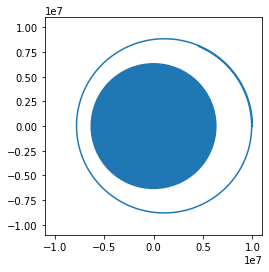

In [ ]:
figure, axes = plt.subplots()
draw_circle = plt.Circle((0, 0), R)
axes.plot(x, y)
axes.set_aspect(1)
axes.add_artist(draw_circle)
axes.set_ylim(-1.1e7, 1.1e7)
axes.set_xlim(-1.1e7, 1.1e7)
plt.show()

In [ ]:
def find_val(x, y, t, point, col, num=1):
  dat = {'x': x, 'y': y, 't':t}
  df = pd.DataFrame(data=dat)

  return df.iloc[(df[col]-point).abs().argsort()[:num]]

In [ ]:
def find_period(x, y, t):
  dat = {'x': x, 'y': y, 't':t}
  df = pd.DataFrame(data=dat)
  df = df[df['x'] > 0]
  res = list(df.iloc[(df['y']-0).abs().argsort()[:2]].t)
  return res[1]

In [ ]:
find_period(x, y, t)

8317.831783178317

In [ ]:
def find_a(x, y, t):
  dat = {'x': x, 'y': y, 't':t}
  df = pd.DataFrame(data=dat)
  df = df[df['x'] < 0]
  res = list(df.iloc[(df['y']-0).abs().argsort()[:2]].x)
  return abs(rc - res[0])/2

In [ ]:
print(find_a(x, y, t))

8896653.128993036


In [ ]:
def kepler_err(x, y, t):
  T = find_period(x, y, t)
  a = find_a(x, y, t)
  return abs(T - 2*math.pi*pow(a, 3/2)/math.sqrt(gam*M))

In [ ]:
print(kepler_err(x, y, t))

23.656181770751573


In [ ]:
errs = []
for h in [10, 5, 1, 0.5, 0.1, 0.01]:
  t, [x, vx, y, vy] = rk_solve(a, b, h, y0)
  errs.append(kepler_err(x, y, t))
print(errs)

[238.34803770424242, 117.61196848965847, 23.656181770751573, 12.195228037870038, 2.4326697509568476, 0.24176132358479663]


In [ ]:
for ui in range(735, 745):

  y0 = [
      rc,
      0,
      0,
      vc - ui
  ]

  a = 0
  b = 10000

  h = 0.1
  t, [x, vx, y, vy] = rk_solve(a, b, h, y0)
  axis = find_a(x, y, t)
  print(ui, 2*axis < (rc + R))

735 False
736 False
737 False
738 False
739 False
740 False
741 False
742 True
743 True
744 True


In [ ]:
  y0 = [
      rc,
      0,
      0,
      vc - 742
  ]

  a = 0
  b = 10000

  h = 0.1
  t, [x, vx, y, vy] = rk_solve(a, b, h, y0)

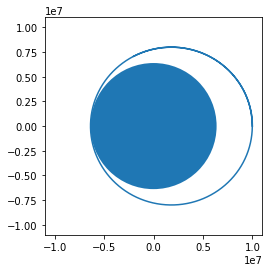

In [ ]:
figure, axes = plt.subplots()
draw_circle = plt.Circle((0, 0), R)
axes.plot(x, y)
axes.set_aspect(1)
axes.add_artist(draw_circle)
axes.set_ylim(-1.1e7, 1.1e7)
axes.set_xlim(-1.1e7, 1.1e7)
plt.show()

# Явный метод Эйлера

In [ ]:
u = 745
y0 = [
      rc,
      0,
      0,
      vc - u
]

In [ ]:
a = 0
b = 10000

In [ ]:
h = 0.1

In [ ]:
def step(y, t, h):
  return y + h * f(t, y)

def explicit_euler(a, b, h, y0):

  n = int(np.ceil((b-a)/h))
  t = np.linspace(a, b, num=n+1)

  y = np.array([np.zeros(n+1) for i in range(len(y0))])
  y[:, 0] = y0

  for i in range(n):
    ynew = step(y[:, i], t[i], h)
    y[:, i + 1] = ynew

  return t, y

In [ ]:
t, [x, vx, y, vy] = explicit_euler(a, b, h, y0)

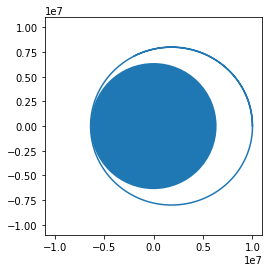

In [ ]:
figure, axes = plt.subplots()
draw_circle = plt.Circle((0, 0), R)
axes.plot(x, y)
axes.set_aspect(1)
axes.add_artist(draw_circle)
axes.set_ylim(-1.1e7, 1.1e7)
axes.set_xlim(-1.1e7, 1.1e7)
plt.show()